# Programming Machine Learning Lab
## Exercise 01

### INSTRUCTIONS

1. You need to submit the pdf as well as the filled notebook file.
2. Name your submissions by prefixing your matriculation number to the filename. Example, if your MR is 12345 then rename the files as **"12345_Exercise_1.xxx"**
3. Complete all your tasks and then do a clean run before generating the final pdf. (_Clear All Ouputs_ and _Run All_ commands in Jupyter notebook)

#### Exercise 1.1


In this part of the assignment, you have to write a word count program. Your program should read the provided text document on learnweb named __random text.txt__ and then output the following stats:

1. The number of unique non-stop words. (Hint: you can use ”nltk” library to get a list of English language stop words.)
1. The top 5 most frequent non-stop words (along with the number of occurances).
1. Compute the letter frequency (number of times each letter is present) from the whole document and plot it.



The number of unique non-stop words:	393
        word  count
0      Harry     30
1  Voldemort     13
2       also      8
3         He      8
4       Dark      7


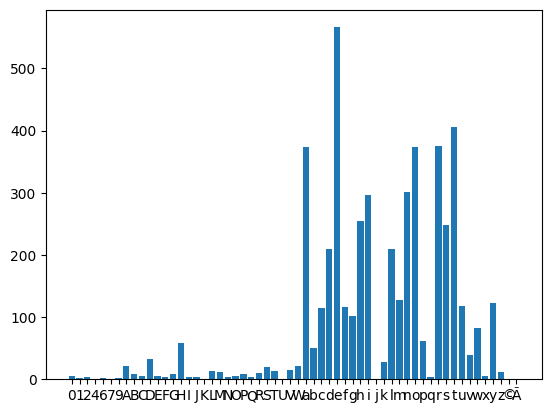

In [73]:
### Write your code here
import nltk
from nltk.corpus import stopwords
import string 
import pandas as pd
import matplotlib.pyplot as plt

# run this to download the neccessary packages for NLTK
# nltk.download()
# storing punctuations and stop words
stops = set(stopwords.words('english'))
puncs = string.punctuation 

# variable initialization
word_dict = {}
letter_dict = {}

def count(file):
    for line in file:
        # removing empty spaces left and right
        line = line.strip()
        # removing punctuation
        for p in puncs:
            if p in line:
                line = line.replace(p, " ")
        line = line.replace("  ", " ")
        # computing leeter frequency
        for letter in line:
            if len(letter.strip()) > 0:
                if letter in letter_dict:
                    letter_dict[letter] += 1
                else:
                    letter_dict[letter] = 1
        # spliting the words
        words = line.split(" ")
        # excluding stop words
        words = [word.strip() for word in words if word not in stops and len(word.strip()) > 0]
        # updating our dictionary
        for word in words:
            if word in word_dict:
                word_dict[word] += 1
            else:
                word_dict[word] = 1

with open('random_text.txt', 'r') as file:
    count(file)
    df = pd.DataFrame({'word': word_dict.keys(), 'count': word_dict.values()}) 
    df = df.sort_values(by='count', ascending=False, ignore_index=True)
    letter_df = pd.DataFrame({'letter': letter_dict.keys(), 'count': letter_dict.values()}) 
    letter_df = letter_df.sort_values(by='letter', ascending=True, ignore_index=True)

print(f'The number of unique non-stop words:\t{df.shape[0]}')

print(df.head())

fig, ax = plt.subplots()
ax.bar(letter_df['letter'], letter_df['count'])
plt.show()

#### Exercise 1.2


In a simple regression problem we fit a straight line $y = mx+b$ to a given data. However, not all problems in nature are by default linear. Given the data below see if a straight line is a good fit.


| x | 0.0 | 0.5  | 1.0 | 1.5  | 2.0  | 2.5  | 3.0  | 3.5  | 4.0  | 4.5  | 5.0  |
|---|-----|------|-----|------|------|------|------|------|------|------|------|
| y | 6.0 | 4.83 | 3.7 | 3.15 | 2.41 | 1.83 | 1.49 | 1.21 | 0.96 | 0.73 | 0.64 |

In cases where the data does not follow a linear trend, one can transform the variables and then apply the  linear regression technique to better fit the data. 

Generate a 2 x 2 subplot with the following techniques, plot, semilogx, semilogy, loglog. Read about these plotting techniques. These plots will let you understand which of the below 5 choices will be the best fit. Plot the data points and the best fit curve in a well-formatted plot with axis labels, title and the legend. From the given choices, try which function would be a better representation for the data.

1.  Linear : $y=mx+b$
1.  Power : $y = bx^m$
1.  Exponential : $y = be^{mx}$
1.  Logarithmic : $y = m \times \text{log}x + b$
1.  Reciprocal : $y = \frac{1}{mx+b}$

**(Hint: you can use the polyfit function from numpy for this part.)**

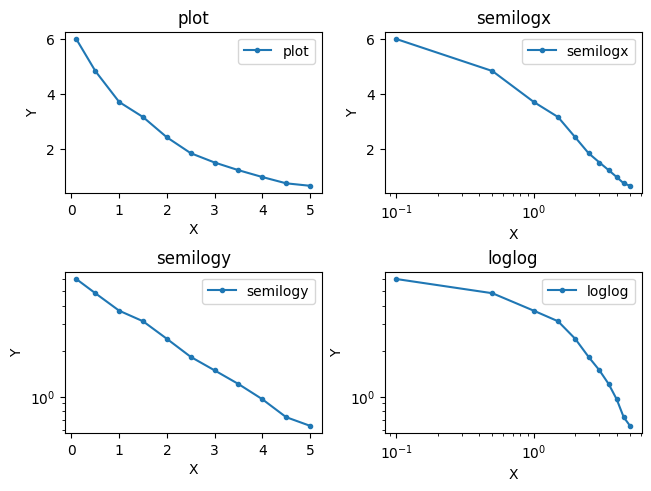

In [74]:
#### Write your code here
import matplotlib.pyplot as plt
import numpy as np

x = np.array([ 0.1 , 0.5  , 1.0 , 1.5 , 2.0 , 2.5 , 3.0  , 3.5 , 4.0 , 4.5 , 5.0  ])
y = np.array([6.0, 4.83 , 3.7 , 3.15, 2.41 , 1.83 , 1.49 , 1.21 ,0.96 , 0.73 , 0.64])
fig, ax = plt.subplots(nrows=2, ncols=2, layout='constrained')
# plot
ax[0][0].set_title("plot")
ax[0][0].set_xlabel('X')
ax[0][0].set_ylabel('Y')
ax[0][0].plot(x, y, ".-", label='plot')
ax[0][0].legend()
# semilogx
ax[0][1].set_title("semilogx")
ax[0][1].set_xlabel('X')
ax[0][1].set_ylabel('Y')
ax[0][1].semilogx(x, y, ".-", label='semilogx')
ax[0][1].legend()
# semilogy
ax[1][0].set_title("semilogy")
ax[1][0].set_xlabel('X')
ax[1][0].set_ylabel('Y')
ax[1][0].semilogy(x, y, ".-", label='semilogy')
ax[1][0].legend()
# loglog
ax[1][1].set_title("loglog")
ax[1][1].set_xlabel('X')
ax[1][1].set_ylabel('Y')
ax[1][1].loglog(x, y, ".-", label='loglog')
ax[1][1].legend()
plt.show()

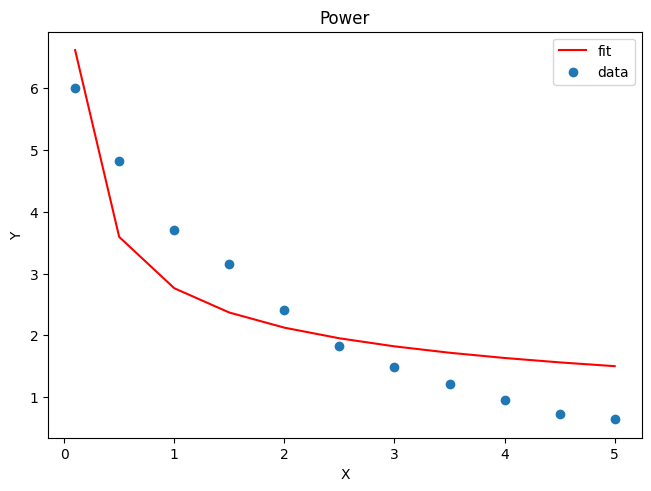

In [75]:
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * (pow(x, b))
popt, pcov = curve_fit(func, x, y)
y_hat = popt[0] * (pow(x, popt[1]))
fig, ax = plt.subplots(layout='constrained')
ax.set_title("Power")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot(x, y_hat, "r", label='fit')
ax.scatter(x, y, label='data')
ax.legend()
plt.show()

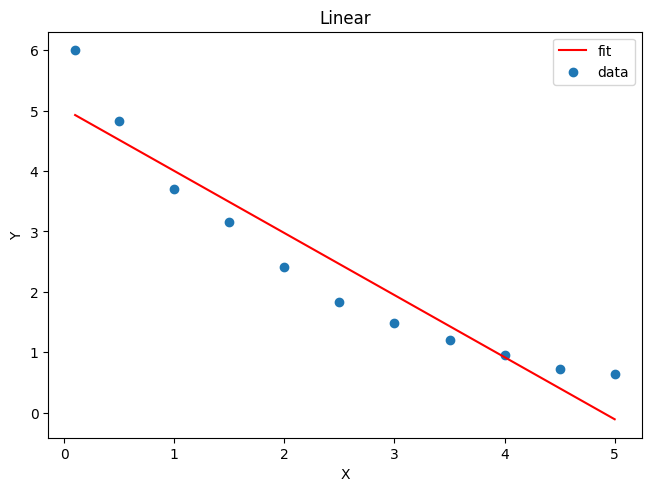

In [76]:
from numpy.polynomial import polynomial as P
c, stats = P.polyfit(x, y, 1 ,full=True)
y_hat = c[1]*x + c[0]
fig, ax = plt.subplots(layout='constrained')
ax.set_title("Linear")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot(x, y_hat, "r", label='fit')
ax.scatter(x, y, label='data')
ax.legend()
plt.show()

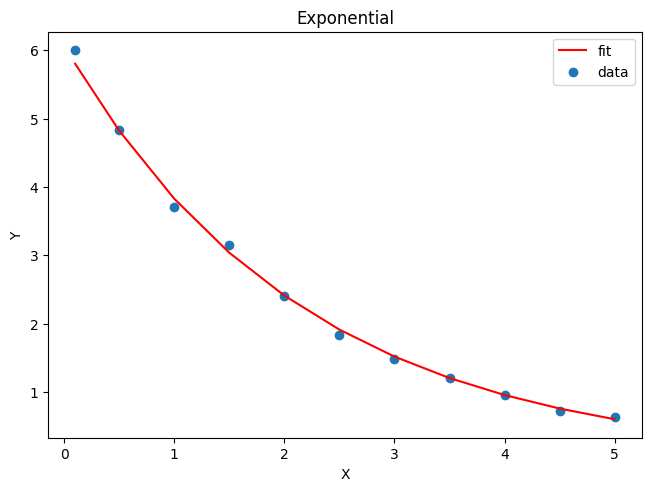

In [77]:
log_ydata = np.log(y)
c, stats = P.polyfit(x, log_ydata, 1 ,full=True)
y_hat = np.exp(c[1]*x)*np.exp(c[0])
fig, ax = plt.subplots(layout='constrained')
ax.set_title("Exponential")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot(x, y_hat, "r", label='fit')
ax.scatter(x, y, label='data')
ax.legend()
plt.show()

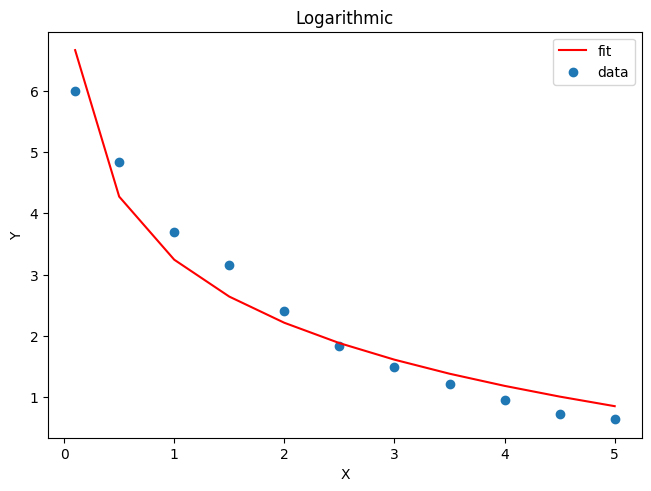

In [78]:
log_x_data = np.log(x)
c, stats = P.polyfit(log_x_data, y, 1 ,full=True)
y_hat = c[1]*log_x_data + c[0]
fig, ax = plt.subplots(layout='constrained')
ax.set_title("Logarithmic")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot(x, y_hat, "r", label='fit')
ax.scatter(x, y, label='data')
ax.legend()
plt.show()

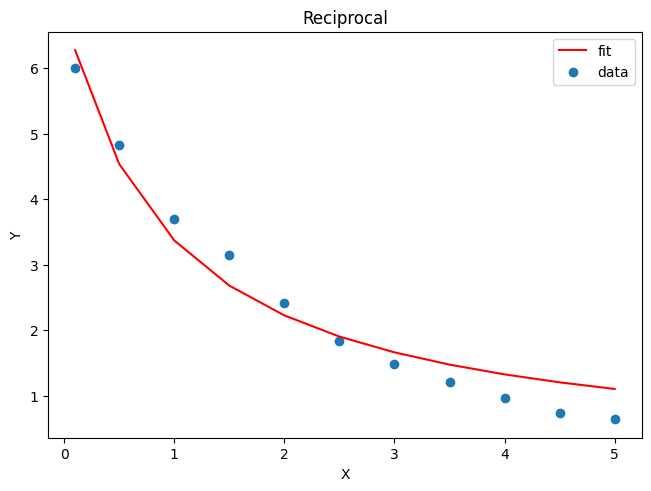

In [79]:
from scipy.optimize import curve_fit
def func(x, a, b):
    return 1 / (a*x + b)
popt, pcov = curve_fit(func, x, y)
y_hat =  1 / (popt[0]*x + popt[1])
fig, ax = plt.subplots(layout='constrained')
ax.set_title("Reciprocal")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot(x, y_hat, "r", label='fit')
ax.scatter(x, y, label='data')
ax.legend()
plt.show()

#### Exercise 1.3



In this part of the task, you will implement the linear regression from scratch. The task is to have a user-defined function that will fit data points to a linear function of the form $y=mx+b$. The function will be named ${liner\_fit(x,y)}$. It accepts 2 arguments $x$ and $y$ and must return the coefficients $b,m$ which are the constants of the fitted equation. Use your function on the data below and generate a plot that shows the data points and also the fitted function.

| x | -0.1 | 0.7  | 1.6  | 3.2  | 4.1  | 5.2 | 6.4  | 6.6 | 7.7 | 8.5 | 10.2 | 10.7 | 12.2 | 12.8 |
|---|------|------|------|------|------|-----|------|-----|-----|-----|------|------|------|------|
| y | -0.9 | -1.4 | -1.1 | -0.7 | -0.2 | 0.0 | -0.2 | 0.1 | 0.9 | 1.0 | 0.9  | 1.4  | 1.3  | 1.6  |

You are required to implement the algorithm below for the task.

**Inputs** $x$ and $y$ as 1-D vectors

**Output** Compute $b,m$ for fitted equation

learn-simple-linreg($x, y$): <br>
1. $\bar x := \frac{1}{N} \sum_{n=1}^N x_n$  <br>
1. $\bar y := \frac{1}{N} \sum_{n=1}^N y_n$  <br>
1. $\hat\beta_1 := \frac{ \sum_{n=1}^N (x_n-\bar x)(y_n-\bar y) }{ \sum_{n=1}^N (x_n-\bar x)^2 }$  <br>
1. $\hat\beta_0 := \bar y - \hat\beta_1 \bar x $  <br>
1. $return (\hat\beta_0, \hat\beta_1)$  <br>




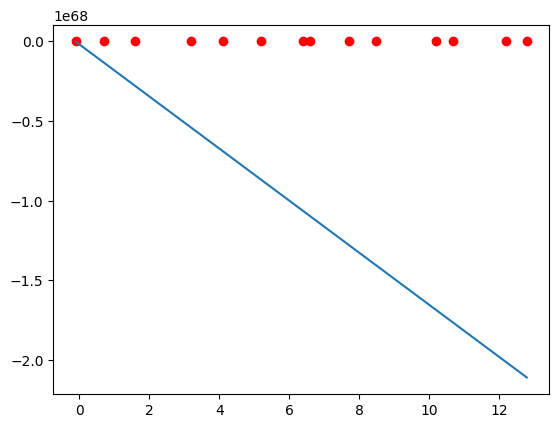

In [80]:
#### Write your code here

x = np.array([-0.1,0.7,1.6,3.2,4.1,5.2,6.4,6.6,7.7,8.5,10.2, 10.7, 12.2, 12.8])
y = np.array([-0.9,-1.4,-1.1,-0.7,-0.2,0.0,-0.2,0.1,0.9,1.0,0.9,1.4,1.3,1.6])


ln = 0.05
epochs = 100

def fit(x, y):
    m = 0
    b = 0
    for i in range(epochs):
        y_predict = (m*x) + b 
        m_grad = (
            -2 * np.sum(x * (y - y_predict))
            ) / len(x)
        b_grad = (-2*np.sum(y - y_predict)) / len(x)
        m = m - (ln*m_grad)
        b = b - (ln*b_grad)
    return (m, b)

(m, b) = fit(x, y)

y_hat = (m*x) + b 
fig, ax = plt.subplots()
ax.scatter(x, y, c='red')
ax.plot(x, y_hat)
plt.show()

#### Exercise 1.4



In this part of the assignment, we will explore the 3D plotting capabilities in Python. Specifically, we will generate a 3D plot of an ice cream cone. The cone is 8 inches tall and has a base diameter of 4 inch. Furthermore, the top of the ice-cream is a hemisphere of 4-inch diameter. We define the following parametric equations for the cone: $$x = r\:cos\theta, y = r\: sin\theta, z = 4r$$ 
with $\theta \in [0, 2\pi]$ and $r \in [0, 2]$
  
  
Also, for the top of ice-cream which is hemisphere, the equations are: $$x = r\: cos\theta\: sin\phi, y = r\: sin\theta \:sin\phi, z = 8+r\: cos\phi$$  with $\theta \in [0, 2\pi]$ and $\phi \in [0, \pi]$ 

Generate the 3D mesh plot for the ice-cream cone described by the equations. You are required to properly format the plot with axis labels, titles and grid. Specifically, you are required to learn how to produce well-formatted plots with symbols and latex formatting in the title and label. A poor formatting of plot will be penalized. Use __numpy__ for all computations.

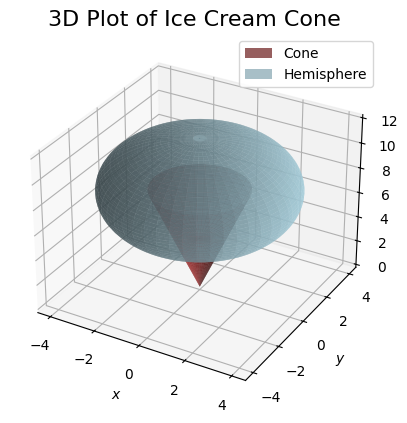

In [81]:
#### Write your code here
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the parameter ranges
theta = np.linspace(0, 2 * np.pi, 100)
r_cone = np.linspace(0, 2, 100)
phi = np.linspace(0, np.pi, 100)
r_hemisphere = 4  # The hemisphere has a fixed radius

# Create meshgrid for (theta, r) in the cone
Theta, R_cone = np.meshgrid(theta, r_cone)
X_cone = R_cone * np.cos(Theta)
Y_cone = R_cone * np.sin(Theta)
Z_cone = 4 * R_cone

# Create meshgrid for (theta, phi) in the hemisphere
Theta, Phi = np.meshgrid(theta, phi)
X_hemisphere = r_hemisphere * np.sin(Phi) * np.cos(Theta)
Y_hemisphere = r_hemisphere * np.sin(Phi) * np.sin(Theta)
Z_hemisphere = 8 + r_hemisphere * np.cos(Phi)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the cone
ax.plot_surface(X_cone, Y_cone, Z_cone, color='brown', alpha=0.7, label='Cone')

# Plot the hemisphere
ax.plot_surface(X_hemisphere, Y_hemisphere, Z_hemisphere, color='lightblue', alpha=0.7, label='Hemisphere')

# Set axis labels and title with LaTeX formatting
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title('3D Plot of Ice Cream Cone', fontsize=16)

# Add a legend
ax.legend()

# Display the grid
ax.grid(True)

# Show the plot
plt.show()

#### Exercise 1.5

In this task you are required to explore a real-world dataset from the airport dataset named __task1.txt__. You are required to the following:
- Load the dataset using pandas and display all necessary information contained in the file.
- You are tasked as a data scientist to create a story that is visually appealing from this data. Create plots using __matplotlib/seaborn__ that will depict such interesting stories from flights that depart from and arrive in the Austin region. The figures should be annotated properly and also easily understandable on the first glance. A list of questions that can be explored/answered as reference are given below. Of course, you are free to explore any other possibilities.
    - Investigate what time of the day it is best to fly so as to have the least possible delays. Does this change with airlines?
    - Investigate what time of the year it is more suited to fly so as to have the delays minimum and does the destination affect this? You can lay insights on some popular destinations for the task.
    - Explore some airports that are bad to fly to. Does the time of day or year affect this?
    - Investigate on how the pattern of flights to various destinations alter over the course of year.

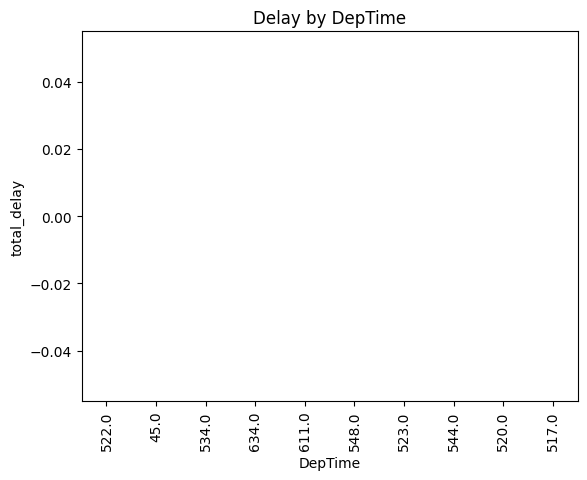

In [82]:
#### Write your code here
import pandas as pd

df = pd.read_csv('task1.txt', delimiter=',', index_col=None, header=0)
# first task
df['CarrierDelay'].fillna(0, inplace=True)
df['WeatherDelay'].fillna(0, inplace=True)
df['NASDelay'].fillna(0, inplace=True)
df['SecurityDelay'].fillna(0, inplace=True)
df['LateAircraftDelay'].fillna(0, inplace=True)
df['total_delay'] = df['CarrierDelay'] + df['WeatherDelay'] + df['NASDelay'] + df['SecurityDelay'] + df['LateAircraftDelay']
gp_time = df.groupby('DepTime')['total_delay'].sum().sort_values(ascending=True).head(10)
gp_time.plot(kind='bar')
plt.xlabel('DepTime')
plt.ylabel('total_delay')
plt.title('Delay by DepTime')
plt.show()

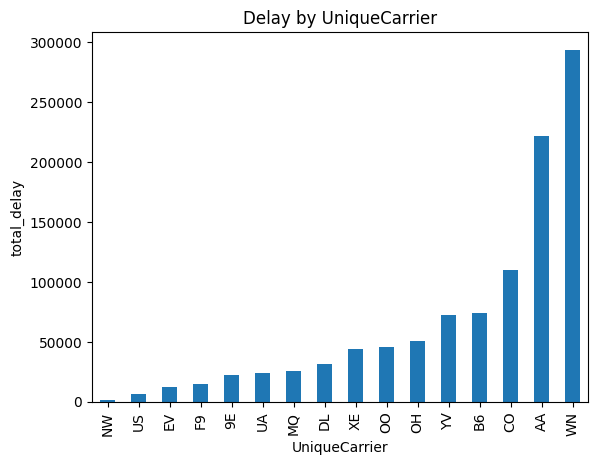

In [83]:
gp_airline = df.groupby('UniqueCarrier')['total_delay'].sum().sort_values(ascending=True)
gp_airline.plot(kind='bar')
plt.xlabel('UniqueCarrier')
plt.ylabel('total_delay')
plt.title('Delay by UniqueCarrier')
plt.show()

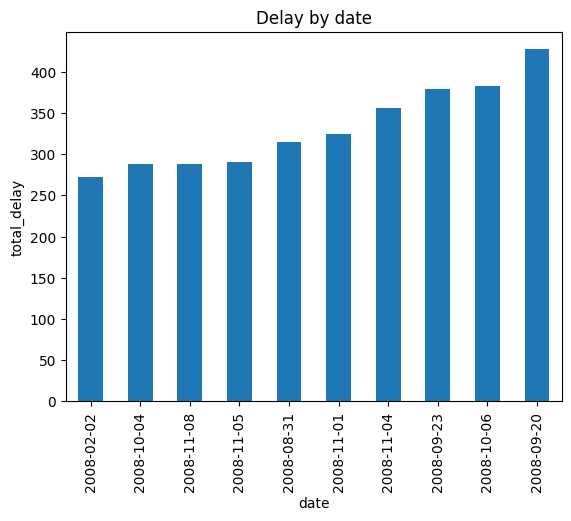

In [84]:
df['date'] = df['Year'].astype(str) + '-' + np.where(df['Month'] < 10, '0' + df['Month'].astype(str), df['Month'].astype(str))\
    + '-' + np.where(df['DayofMonth'] < 10, '0' + df['DayofMonth'].astype(str), df['DayofMonth'].astype(str))
gp_timeOfTheYear = df.groupby('date')['total_delay'].sum().sort_values(ascending=True).head(10)
gp_timeOfTheYear.plot(kind='bar')
plt.xlabel('date')
plt.ylabel('total_delay')
plt.title('Delay by date')
plt.show()

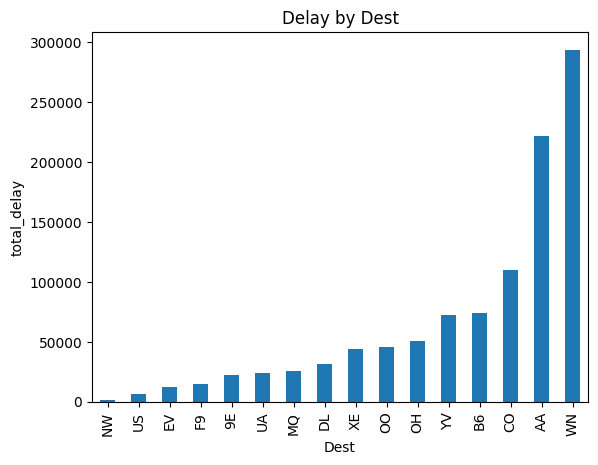

In [85]:
gp_dest = df.groupby('Dest')['total_delay'].sum().sort_values(ascending=True)
gp_airline.plot(kind='bar')
plt.xlabel('Dest')
plt.ylabel('total_delay')
plt.title('Delay by Dest')
plt.show()

#### Exercise 1.6

In this part we will examine the data containing information on every Olympic medallist that is listed by participant count in top 20 sports, dating back to 1896. Load the dataset __task2.txt__ and perform statistical analysis on the dataset. Specifically, do the following:
- Compute the $95^{\text{th}}$ percentile of heights for the competitors in all Athletic events for gender Female. Note that sport refers to the broad sports (Athletics) and event is the specific event (100-meter sprint).
- Find the single woman’s event that depicts the highest variability in the height of the competitor across the entire history of Olympics. Use the standard deviation as the yardstick for this.
- We wish to know how the average age of swimmers in Olympic has evolved with time. How has this changed over time? Does the trend for this differs from male to female? It will be easy to create a data frame that will allow one to visualise these trends with time. Plot a line graph that depicts separate line for male and female competitors. The plot must have a caption that is informative enough to answer the 2 questions that have been asked in this part.
- Feel free to explore any other interesting statistic/visualization from the data

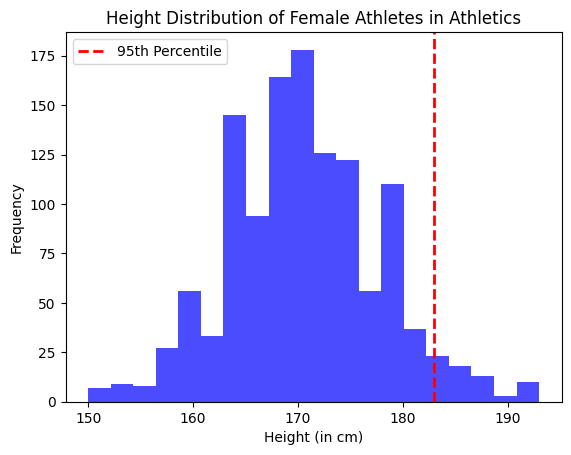

In [86]:
#### Write your code here
import pandas as pd

df = pd.read_csv('task2.txt', delimiter=',', index_col=None, header=0)

df1 = df[(df['sex'] == 'F') & (df['sport'] == 'Athletics')]
percentile_95 = df1['height'].quantile(0.95)

# Step 4: Plot the data
plt.figure()
plt.hist(df1['height'], bins=20, color='blue', alpha=0.7)
plt.axvline(percentile_95, color='red', linestyle='dashed', linewidth=2, label='95th Percentile')
plt.xlabel('Height (in cm)')
plt.ylabel('Frequency')
plt.title('Height Distribution of Female Athletes in Athletics')
plt.legend()
plt.show()

In [87]:
female_athletes = df[df['sex'] == 'F']

# Step 3: Calculate the standard deviation of heights for each women's event
event_std_dev = female_athletes.groupby('event')['height'].std().sort_values(ascending=False)
event_std_dev.head(1)

event
Rowing Women's Coxed Fours    10.86549
Name: height, dtype: float64

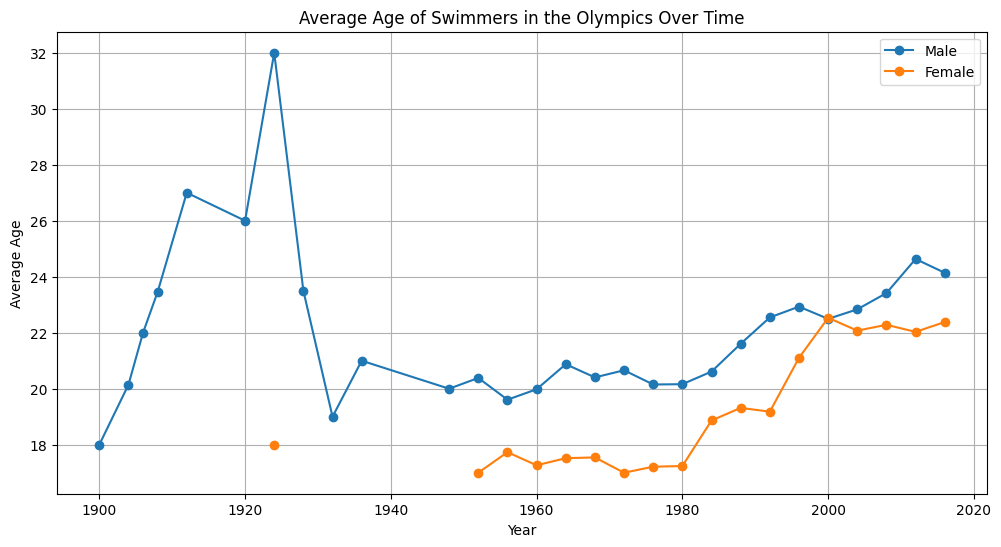

In [88]:
swimmers = df[df['sport'] == 'Swimming']

# Step 3: Calculate the average age of swimmers by year and gender
average_age = swimmers.groupby(['year', 'sex'])['age'].mean().reset_index()

# Step 4: Create a DataFrame for visualization
df3 = average_age.pivot(index='year', columns='sex', values='age')

# Plot a line graph for male and female swimmers
plt.figure(figsize=(12, 6))
plt.plot(df3.index, df3['M'], label='Male', marker='o')
plt.plot(df3.index, df3['F'], label='Female', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Age')
plt.title('Average Age of Swimmers in the Olympics Over Time')
plt.legend()
plt.grid(True)
plt.show()